Regression and Basic Plotting
===
---
1. Examining data - summary, tab, corr, ci
2. Regression
3. Graph - scatter plot
4. Output
---

In [2]:
setwd("/Users/tino/Desktop/TA-Econometrics-II/notebooks_R")
getwd()

[1] "/Users/tino/Desktop/TA-Econometrics-II/notebooks_R"

In [1]:
library(tidyverse)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘dplyr’ was built under R version 3.5.1”Warning message:
“package ‘stringr’ was built under R version 3.5.2”─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
attend <- read.csv("attend.csv")
attend <- attend[ , c(-1)]

In [5]:
str(attend)

'data.frame':	680 obs. of  7 variables:
 $ final  : int  28 26 30 27 34 25 10 34 26 26 ...
 $ termGPA: num  3.19 2.73 3 2.04 3.68 ...
 $ priGPA : num  2.64 3.52 2.46 2.61 3.32 ...
 $ ACT    : int  23 25 24 20 23 26 21 22 24 21 ...
 $ frosh  : int  0 0 0 0 0 0 1 0 1 0 ...
 $ soph   : int  1 0 0 1 1 1 0 1 0 1 ...
 $ missed : int  5 10 2 1 0 3 2 6 8 3 ...


---
## 1. Examining data
* summary(data) - Min, 1st Qu., Mean, Median, 3rd Qu., Max of each variables.
* mean(data\$var1), sd(data\$var1) - mean, standard deviation of var1.
* summary(data\[ data\$var1 == x, c("var2") \]) - conditional on var1 = x, the summary statistics of var2.
* cor(data) or cor(data\$var1, data\$var2) - correlation of var1 and var2
* cov(data) or cov(data\$var1, data\$var2) - covariance of var1 and var2
* t.test(data\$var1, conf.level = 0.99) - 99% confidence interval

In [6]:
summary(attend)

     final          termGPA          priGPA           ACT       
 Min.   :10.00   Min.   :0.000   Min.   :0.857   Min.   :13.00  
 1st Qu.:22.00   1st Qu.:2.138   1st Qu.:2.190   1st Qu.:20.00  
 Median :26.00   Median :2.670   Median :2.560   Median :22.00  
 Mean   :25.89   Mean   :2.601   Mean   :2.587   Mean   :22.51  
 3rd Qu.:29.00   3rd Qu.:3.120   3rd Qu.:2.942   3rd Qu.:25.00  
 Max.   :39.00   Max.   :4.000   Max.   :3.930   Max.   :32.00  
     frosh             soph            missed      
 Min.   :0.0000   Min.   :0.0000   Min.   : 0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 2.000  
 Median :0.0000   Median :1.0000   Median : 4.000  
 Mean   :0.2324   Mean   :0.5765   Mean   : 5.853  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.: 8.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :30.000  

In [17]:
mean(attend$final)
sd(attend$final)

[1] 25.89118

[1] 4.709835

In [20]:
summary(attend[attend$frosh == 1, c("final")]) # summary of final if frosh == 1
summary(attend[attend$frosh == 0, c("final")]) # summary of final if frosh == 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   22.00   24.50   25.13   28.00   36.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.00   23.00   26.00   26.12   30.00   39.00 

In [29]:
cor(attend) # correlation matrix

,final,termGPA,priGPA,ACT,frosh,soph,missed
final,1.00000000,0.5106093,0.3659273,0.3612486,-0.08863969,0.02760874,-0.14003268
termGPA,0.51060930,1.0000000,0.6531677,0.2456413,-0.13077281,0.13227078,-0.55977537
priGPA,0.36592731,0.6531677,1.0000000,0.3537694,-0.30847390,0.24113602,-0.42718800
ACT,0.36124857,0.2456413,0.3537694,1.0000000,-0.14936307,0.10918162,0.15638641
frosh,-0.08863969,-0.1307728,-0.3084739,-0.1493631,1.00000000,-0.64185966,0.01995279
soph,0.02760874,0.1322708,0.2411360,0.1091816,-0.64185966,1.00000000,-0.05206150
missed,-0.14003268,-0.5597754,-0.4271880,0.1563864,0.01995279,-0.05206150,1.00000000


In [39]:
cor(attend$final, attend$priGPA)

[1] 0.3659273

In [40]:
cov(attend) # covariance matrix

,final,termGPA,priGPA,ACT,frosh,soph,missed
final,22.18254353,1.77140499,0.93879137,5.9392662,-0.17644460,0.06429871,-3.59776488
termGPA,1.77140499,0.54255896,0.26206967,0.6316053,-0.04071134,0.04817673,-2.24923565
priGPA,0.93879137,0.26206967,0.29671343,0.6726820,-0.07101686,0.06495022,-1.26936157
ACT,5.93926622,0.63160530,0.67268198,12.1854609,-0.22036299,0.18846054,2.97795201
frosh,-0.17644460,-0.04071134,-0.07101686,-0.2203630,0.17862774,-0.13414190,0.04600191
soph,0.06429871,0.04817673,0.06495022,0.1884605,-0.13414190,0.24451183,-0.14043143
missed,-3.59776488,-2.24923565,-1.26936157,2.9779520,0.04600191,-0.14043143,29.75742874


In [41]:
cov(attend$final, attend$missed)

[1] -3.597765

In [43]:
t.test(attend$final, conf.level = 0.99) # t score and 99% confidence interal


	One Sample t-test

data:  attend$final
t = 143.35, df = 679, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 25.42463 26.35772
sample estimates:
mean of x 
 25.89118 


---
## 2. Regression
* m <- lm(dependent_var ~ independent_var1 + independent_var2 + ..., data = your_data)
* summary(m)
* coef(m)
* confint(m)

In [46]:
m <- lm(final ~ missed, data = attend) # assign linear regression model to variable m

In [47]:
summary(m) # details of variable m


Call:
lm(formula = final ~ missed, data = attend)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.3570  -3.2361  -0.1152   3.1568  12.7639 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.59882    0.26259 101.293  < 2e-16 ***
missed      -0.12090    0.03283  -3.683 0.000249 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.667 on 678 degrees of freedom
Multiple R-squared:  0.01961,	Adjusted R-squared:  0.01816 
F-statistic: 13.56 on 1 and 678 DF,  p-value: 0.0002493


In [48]:
coef(m) # coefficients of m

(Intercept)      missed 
 26.5988151  -0.1209031

In [49]:
confint(m) # 95% confidence interval of coefficients

,2.5 %,97.5 %
(Intercept),26.083222,27.11440807
missed,-0.185367,-0.05643915


## 3. Graph 
* plot(data\$var1, data\$var2)
* plot(attend\$priGPA, attend\$termGPA, main = "Example of Scatter Plot", xlab = "Term GPA", ylab = "Prior GPA")
* fitted <- lm(priGPA ~ termGPA, data = attend)
* abline(fitted)

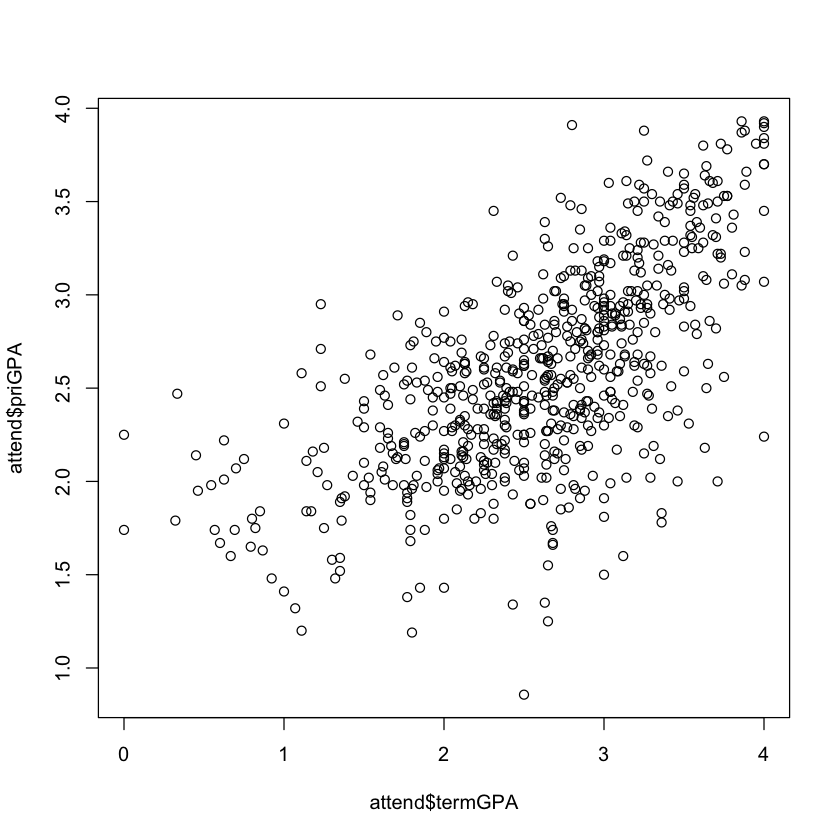

In [58]:
plot(attend$termGPA, attend$priGPA) # scatter plot of termGPA and priGPA

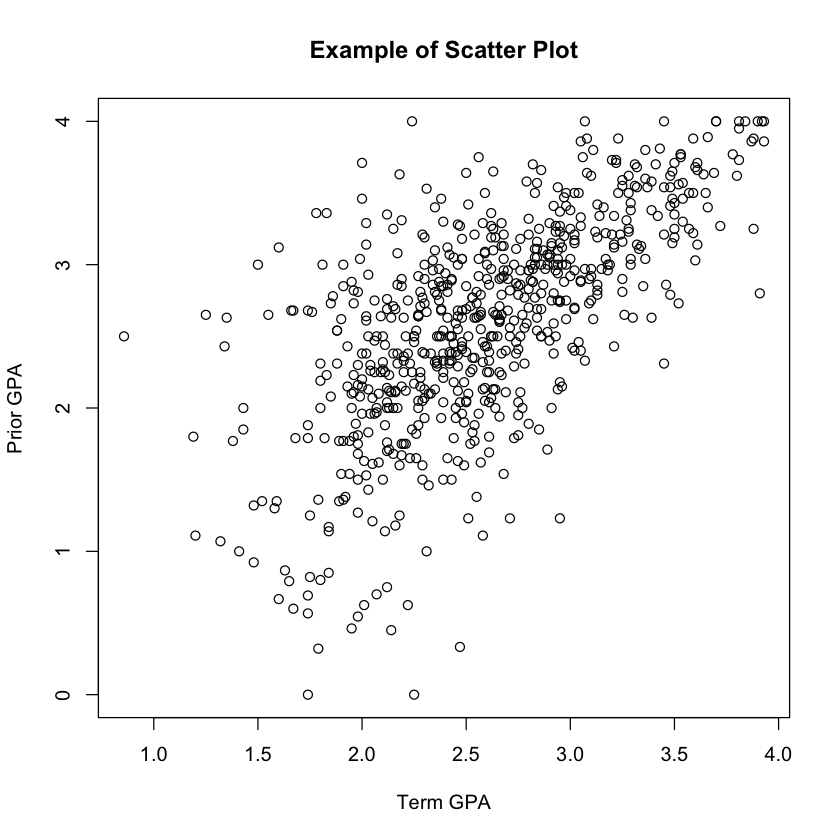

In [68]:
plot(attend$priGPA, attend$termGPA, main = "Example of Scatter Plot", xlab = "Term GPA", ylab = "Prior GPA")

In [60]:
fitted <- lm(priGPA ~ termGPA, data = attend) # create a fitted line named "fitted"

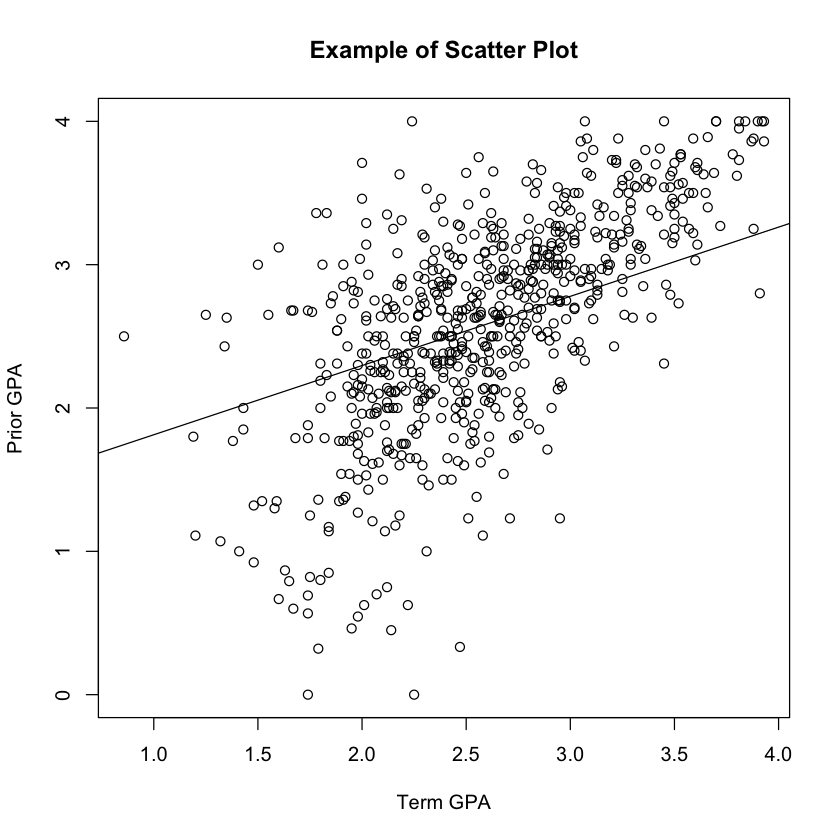

In [69]:
plot(attend$priGPA, attend$termGPA, main = "Example of Scatter Plot", xlab = "Term GPA", ylab = "Prior GPA")
abline(fitted) # add the fitted line on scatter plot

## 4. Output
* install.packages("stargazer") [Reference for Stargazer](https://cran.r-project.org/web/packages/stargazer/vignettes/stargazer.pdf)
* library(stargazer)
* stargazer(m1, m2, title = "Regression Table") 
* stargazer(data, title = "Descriptive Statistics")

\\documentclass\{article\}  
\begin\{document\}  
**latex code**  
\end\{document\}

In [70]:
install.packages("stargazer") 
# stargazer is a r package that can create well-formatted tables.
# you may want to read the refernce


The downloaded binary packages are in
	/var/folders/xj/2zqx0dxn52d5778tkr7r6rp00000gn/T//RtmpkL3Who/downloaded_packages


In [71]:
library(stargazer)
# Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
# R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [73]:
m1 <- lm(final ~ priGPA, data = attend)
m2 <- lm(final ~ missed, data = attend)

In [83]:
stargazer(m1, m2, title = "Regression Table")  
# create the LATEX code for regression table
# use RStudio to open the tex file

#\documentclass{article}  
#\begin{document}  
#**latex code**  
#\end{document}


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: 二,  3 05, 2019 - 12時38分43秒
\begin{table}[!htbp] \centering 
  \caption{Regression Table} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & \multicolumn{2}{c}{final} \\ 
\\[-1.8ex] & (1) & (2)\\ 
\hline \\[-1.8ex] 
 priGPA & 3.164$^{***}$ &  \\ 
  & (0.309) &  \\ 
  & & \\ 
 missed &  & $-$0.121$^{***}$ \\ 
  &  & (0.033) \\ 
  & & \\ 
 Constant & 17.707$^{***}$ & 26.599$^{***}$ \\ 
  & (0.817) & (0.263) \\ 
  & & \\ 
\hline \\[-1.8ex] 
Observations & 680 & 680 \\ 
R$^{2}$ & 0.134 & 0.020 \\ 
Adjusted R$^{2}$ & 0.133 & 0.018 \\ 
Residual Std. Error (df = 678) & 4.386 & 4.667 \\ 
F Statistic (df = 1; 678) & 104.822$^{***}$ & 13.561$^{***}$ \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{2}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{*

![R_output1](img/R_output1.png)

![R_output2](img/R_output2.png)

In [82]:
stargazer(attend, title = "Descriptive Statistics") # create the table of descriptive statistics


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: 二,  3 05, 2019 - 09時10分50秒
\begin{table}[!htbp] \centering 
  \caption{Descriptive Statistics} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
Statistic & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{St. Dev.} & \multicolumn{1}{c}{Min} & \multicolumn{1}{c}{Pctl(25)} & \multicolumn{1}{c}{Pctl(75)} & \multicolumn{1}{c}{Max} \\ 
\hline \\[-1.8ex] 
final & 680 & 25.891 & 4.710 & 10 & 22 & 29 & 39 \\ 
termGPA & 680 & 2.601 & 0.737 & 0.000 & 2.138 & 3.120 & 4.000 \\ 
priGPA & 680 & 2.587 & 0.545 & 0.857 & 2.190 & 2.943 & 3.930 \\ 
ACT & 680 & 22.510 & 3.491 & 13 & 20 & 25 & 32 \\ 
frosh & 680 & 0.232 & 0.423 & 0 & 0 & 0 & 1 \\ 
soph & 680 & 0.576 & 0.494 & 0 & 0 & 1 & 1 \\ 
missed & 680 & 5.853 & 5.455 & 0 & 2 & 8 & 30 \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 


![R_output3](img/R_output3.png)